In [26]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose,
    ShiftScaleRotate
)

In [3]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

# Используем открытый датасет

# KTH Handtool Dataset

https://www.nada.kth.se/cas/data/handtool/

In [4]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [16]:
image = cv2.imread('hdd_storage/yustina/images/KTH/kinect118.jpg')
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [20]:
annotations = {'image': image, 'bboxes': [[17, 67, 401-17, 239-67]], 'category_id': [1]}
category_id_to_name = {1: 'hammer'}

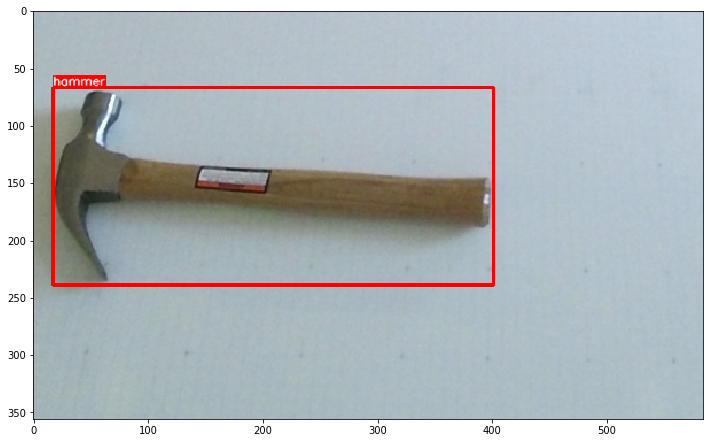

In [21]:
visualize(annotations, category_id_to_name)

# Вертикальное отражение

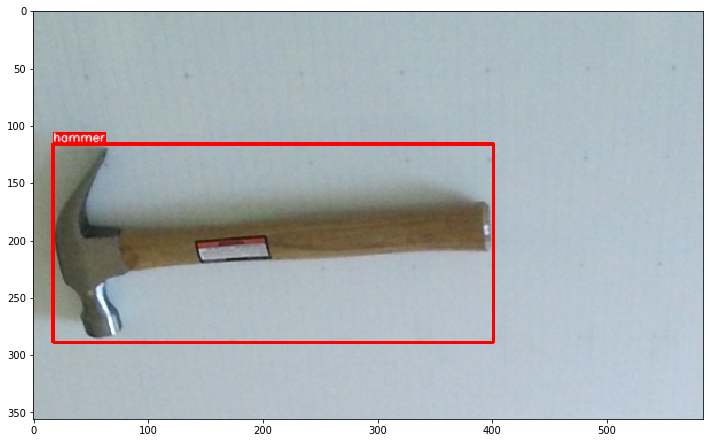

In [22]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

# Смещение, увеличение масштаба и поворот

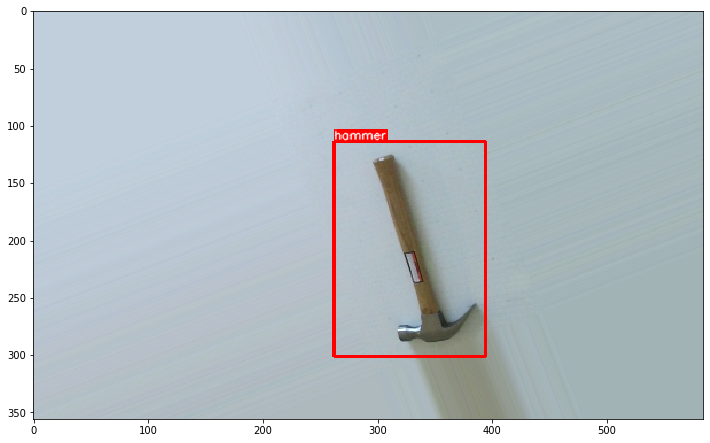

In [55]:
aug = get_aug([ShiftScaleRotate(
    shift_limit=0.0625, 
    scale_limit=0.9, 
    rotate_limit=360, 
    interpolation=1, 
    border_mode=cv2.BORDER_REPLICATE, 
    value=None, 
    mask_value=None, 
    always_apply=False, 
    p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)